In [35]:
from IPython.core.display import HTML, display
display(HTML("<style>.container {width:90% !important;} </style>"))

In [8]:
import numpy as np
import pandas as pd
import altair as alt

alt.data_transformers.enable('json')  # Enable JSON data transformer
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Load Data

The dataset used in this exploration is the movie lens ratings data taken from the [GroupLens](https://grouplens.org/) project. Detailed description of the dataset can be found [here](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

In [3]:
!ls ml-latest-small/

README.txt  links.csv   movies.csv  ratings.csv tags.csv


In [2]:
ratings = pd.read_csv("ml-latest-small/ratings.csv")
tags = pd.read_csv("ml-latest-small/tags.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
tags.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Data Exploration

Before jumping into implementing the recommendation systems, lets explore what the data has to offer.

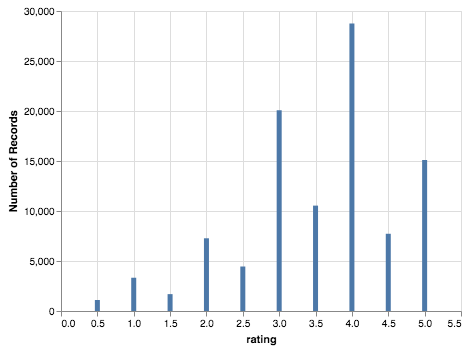

In [23]:
alt.Chart(ratings).mark_bar().encode(x='rating', y='count()')

From the histogram of ratings, we can note that volume of negative ratings (2.5 or lower) is significantly lower that positive with 3.0 and 4.0 being the two most popular choices.

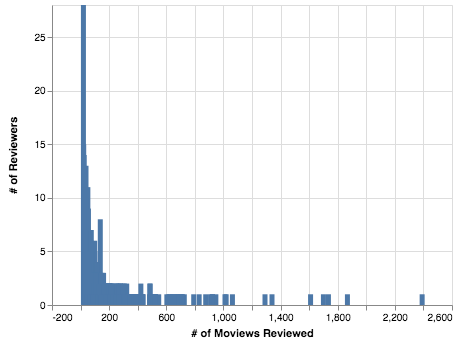

In [24]:
alt.Chart(ratings.groupby('userId')['movieId'].count().reset_index())\
    .mark_bar()\
    .encode(x=alt.X('movieId:Q', axis=alt.Axis(title='# of Movies Reviewed')),
            y=alt.Y('count():Q', axis=alt.Axis(title='# of Reviewers')))

In [39]:
ratings.userId.value_counts()[:5]

547    2391
564    1868
624    1735
15     1700
73     1610
Name: userId, dtype: int64

In [42]:
ratings.userId.value_counts().mean(), ratings.userId.value_counts().median()

(149.03725782414307, 71.0)

While most of the users in the data have rated <200 movies, there are few users who rated over 500 movies. One user has as many as 2400 ratings. It is also worth noting that the mean and median count of user ratings is 149 and 71 respectively. 

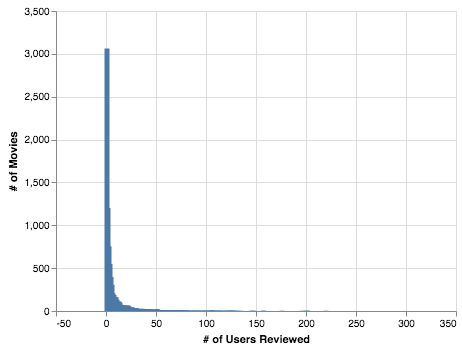

In [31]:
alt.Chart(ratings.groupby('movieId')['userId'].count().reset_index())\
    .mark_bar()\
    .encode(x=alt.X('userId:Q', axis=alt.Axis(title='# of Users Reviewed')),
            y=alt.Y('count():Q', axis=alt.Axis(title='# of Movies')))

In [37]:
ratings.movieId.value_counts()[:5]

(356    341
 296    324
 318    311
 593    304
 260    291
 Name: movieId, dtype: int64, 11.030664019413193)

In [43]:
ratings.movieId.value_counts().mean(), ratings.movieId.value_counts().median()

(11.030664019413193, 3.0)

It can be inferred from the plot that most of the movies have less than 20 reviews but movies with more than 300 reviews are also available in the data. Although it is not evident from the plot, Forrest Gump has 341 reviews. Note that the mean and median count of ratings is 11 and 3 respectively (implying a hevy right skew).